<a href="https://colab.research.google.com/github/arezyhs/Python-Indonesia-Recipes-Recommendation/blob/main/Python_Implementation_of_TFIDF_SVM_Random_Forest_Classifer_on_Recipe_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Rekomendasi Resep Masakan Indonesia Berbasis Machine Learning

# Instalasi Pustaka yang Diperlukan

Pada bagian ini, kita akan menginstal beberapa pustaka Python yang diperlukan untuk proyek ini. Berikut adalah pustaka yang akan diinstal:

- **scikit-learn**: Digunakan untuk machine learning, termasuk pembuatan model klasifikasi dan evaluasi.
- **plotly**: Digunakan untuk visualisasi interaktif yang lebih kompleks (meskipun pada contoh ini tidak digunakan langsung).
- **nltk**: Pustaka Natural Language Toolkit, digunakan untuk pengolahan teks dan stopwords.
- **ipywidgets**: Digunakan untuk membuat antarmuka interaktif dalam Jupyter Notebooks dan Google Colab.
- **xgboost**: Digunakan untuk algoritma XGBoost yang terkenal dalam tugas klasifikasi dan regresi.

In [1]:
# Install pustaka yang dibutuhkan
!pip install -U scikit-learn
!pip install plotly
!pip install nltk
!pip install ipywidgets
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.5 MB/s eta 0:00:00


# Import Pustaka yang Diperlukan dan Membaca Dataset

Pada bagian ini, kita mengimpor pustaka-pustaka yang diperlukan untuk proyek ini, termasuk pustaka untuk pemrosesan data, machine learning, dan visualisasi. Selain itu, kita juga mengunggah dan menggabungkan beberapa file dataset yang akan digunakan dalam proyek ini.

### Pustaka yang Diimpor:
- **pandas**: Digunakan untuk manipulasi dan analisis data.
- **numpy**: Digunakan untuk operasi matematika dan array.
- **os**: Digunakan untuk operasi sistem file.
- **sklearn.feature_extraction.text.TfidfVectorizer**: Digunakan untuk mengonversi teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency).
- **sklearn.metrics.pairwise.cosine_similarity**: Digunakan untuk menghitung similarity antara dua vektor teks menggunakan cosine similarity.
- **sklearn.model_selection.train_test_split**: Digunakan untuk membagi data menjadi data pelatihan dan pengujian.
- **sklearn.svm.SVC**: Digunakan untuk membangun model Support Vector Machine (SVM) untuk klasifikasi.
- **sklearn.ensemble.RandomForestClassifier**: Digunakan untuk membangun model Random Forest.
- **sklearn.metrics.accuracy_score**: Digunakan untuk menghitung akurasi dari model yang dibangun.
- **matplotlib.pyplot**: Digunakan untuk visualisasi grafik.
- **seaborn**: Digunakan untuk visualisasi statistik dan grafik.
- **nltk.corpus.stopwords**: Digunakan untuk mendapatkan daftar kata-kata umum (stopwords) dalam bahasa Indonesia.
- **ipywidgets**: Digunakan untuk membuat antarmuka interaktif di Google Colab.
- **pickle**: Digunakan untuk serialisasi objek Python, seperti menyimpan model yang telah dilatih.

### Proses Membaca dan Menggabungkan Dataset:
- **`files.upload()`**: Mengunggah file CSV yang diperlukan ke Google Colab.
- **`file_names`**: Daftar nama file CSV yang berisi dataset.
- **Membaca dan Menggabungkan Dataset**: Kita membaca setiap file CSV yang ada dalam daftar `file_names` dan menyimpannya dalam list `dataframes`. Kemudian, seluruh dataset digabungkan menjadi satu DataFrame menggunakan `pd.concat()`.

Setelah proses ini, data akan digabungkan menjadi satu DataFrame besar yang dapat digunakan untuk analisis lebih lanjut dan pemrosesan teks.

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from ipywidgets import interact
import pickle

# Mengunggah dataset ke Google Colab (pastikan file CSV di-upload terlebih dahulu)
from google.colab import files
uploaded = files.upload()

# Menyimpan data dalam list
file_names = [
    'dataset-ayam.csv', 'dataset-ikan.csv', 'dataset-kambing.csv',
    'dataset-sapi.csv', 'dataset-tahu.csv', 'dataset-telur.csv',
    'dataset-tempe.csv', 'dataset-udang.csv'
]

# Membaca semua dataset
print("Membaca file dataset...")
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan seluruh dataset menjadi satu
df = pd.concat(dataframes, ignore_index=True)

# Menampilkan beberapa data awal
df.head()

Membaca file dataset...


,Title,Ingredients,Steps,Loves,URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam


# Pembersihan Data

Pada bagian ini, kita melakukan beberapa langkah pembersihan data untuk memastikan dataset siap digunakan untuk analisis dan pemodelan. Langkah-langkah pembersihan mencakup penggantian nilai yang hilang (missing values), pengolahan teks untuk standarisasi, dan penggabungan beberapa kolom menjadi satu kolom teks yang lebih komprehensif.

### Langkah-langkah Pembersihan:
1. **Mengganti Nilai yang Hilang (Missing Values)**:
   - Kolom **'Ingredients'** dan **'Steps'** memiliki nilai yang hilang (NaN) yang diganti dengan string kosong (`''`).
   - Ini memastikan bahwa saat kita memproses teks, tidak ada nilai yang hilang yang bisa menyebabkan error.

2. **Mengubah Teks Menjadi Huruf Kecil**:
   - Kolom **'Title'** yang berisi judul resep diubah menjadi huruf kecil menggunakan `.str.lower()`. Hal ini membantu standarisasi teks agar tidak ada perbedaan antara huruf kapital dan huruf kecil dalam analisis lebih lanjut.

3. **Menggabungkan Kolom 'Title', 'Ingredients', dan 'Steps'**:
   - Kolom **'Title'**, **'Ingredients'**, dan **'Steps'** digabungkan menjadi satu kolom teks yang baru bernama **'text'**. Kolom **'text'** ini akan digunakan untuk menghasilkan fitur teks dalam model analisis dan rekomendasi.

### Hasil:
- Dataset yang telah dibersihkan dan siap digunakan untuk analisis dan pemrosesan teks lebih lanjut.

In [3]:
# Pembersihan data
print("Melakukan pembersihan data...")
df['Ingredients'] = df['Ingredients'].fillna('')  # Mengganti NaN dengan string kosong
df['Steps'] = df['Steps'].fillna('')  # Mengganti NaN dengan string kosong
df['Title'] = df['Title'].str.lower()  # Mengubah semua teks menjadi huruf kecil

# Gabungkan kolom 'Title', 'Ingredients', dan 'Steps' menjadi satu kolom teks
df['text'] = df['Title'] + ' ' + df['Ingredients'] + ' ' + df['Steps']

# Cek hasil gabungan
df[['Title', 'text']].head()

Melakukan pembersihan data...


,Title,text
0,ayam woku manado,ayam woku manado 1 Ekor Ayam Kampung (potong 1...
1,ayam goreng tulang lunak,ayam goreng tulang lunak 1 kg ayam (dipotong s...
2,ayam cabai kawin,ayam cabai kawin 1/4 kg ayam--3 buah cabai hij...
3,ayam geprek,ayam geprek 250 gr daging ayam (saya pakai fil...
4,minyak ayam,minyak ayam 400 gr kulit ayam & lemaknya--8 si...


# Pembuatan Matriks TF-IDF dan Penggunaan Stopwords Bahasa Indonesia

Pada bagian ini, kita melakukan dua hal utama: pertama, mengunduh stopwords bahasa Indonesia menggunakan **nltk**, dan kedua, kita membangun matriks **TF-IDF** yang digunakan untuk representasi numerik dari teks.

### Langkah-langkah:
1. **Mengunduh Stopwords Bahasa Indonesia**:
   - **Stopwords** adalah kata-kata umum yang tidak memiliki banyak makna dalam konteks analisis teks, seperti "dan", "atau", "dengan". Kita akan menggunakan **nltk** untuk mengunduh stopwords dalam bahasa Indonesia yang akan digunakan untuk membersihkan teks sebelum mengubahnya menjadi fitur numerik.

2. **Membuat TF-IDF Vectorizer**:
   - **TF-IDF (Term Frequency-Inverse Document Frequency)** adalah metode untuk mengonversi teks menjadi representasi numerik. Metode ini menghitung pentingnya kata dalam dokumen relatif terhadap seluruh korpus dokumen.
   - Dalam kode ini, kita membuat objek **TfidfVectorizer** dan memberikan stopwords bahasa Indonesia yang telah diunduh untuk menghilangkan kata-kata yang tidak penting.

3. **Fit dan Transform Teks Menjadi Matriks TF-IDF**:
   - **Fit** akan menghitung IDF (Inverse Document Frequency) untuk semua kata dalam kolom teks **'text'**.
   - **Transform** akan mengonversi kolom **'text'** menjadi matriks TF-IDF, di mana setiap baris merepresentasikan sebuah dokumen (dalam hal ini, resep), dan setiap kolom mewakili kata unik yang ada dalam dokumen.

4. **Ukuran Matriks TF-IDF**:
   - Setelah matriks **TF-IDF** terbentuk, kita menampilkan ukuran matriks untuk memastikan bahwa data telah berhasil dikonversi menjadi representasi numerik.

In [4]:
# Mendapatkan stopwords bahasa Indonesia dari nltk
print("Mengunduh stopwords bahasa Indonesia...")
nltk.download('stopwords')
indonesian_stopwords = stopwords.words('indonesian')

# Membuat TF-IDF vectorizer dengan stopwords Bahasa Indonesia
tfidf_vectorizer = TfidfVectorizer(stop_words=indonesian_stopwords)

# Fit transform teks menjadi matriks TF-IDF
print("Membangun TF-IDF matrix...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Cek ukuran matriks TF-IDF
print(f"Ukuran TF-IDF Matrix: {tfidf_matrix.shape}")

Mengunduh stopwords bahasa Indonesia...
Membangun TF-IDF matrix...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Ukuran TF-IDF Matrix: (15641, 19223)


# Fungsi untuk Rekomendasi Resep

Pada bagian ini, kita mendefinisikan fungsi **`recommend_recipe`** yang digunakan untuk memberikan rekomendasi resep berdasarkan masukan dari pengguna. Fungsi ini menggunakan **Cosine Similarity** untuk mencari resep yang paling mirip dengan query (input) pengguna.

### Langkah-langkah dalam Fungsi **`recommend_recipe`**:

1. **Menerima Input Pengguna**:
   - Fungsi ini menerima parameter `query`, yang merupakan input teks dari pengguna yang ingin mencari resep yang relevan.
   - Parameter `top_n` menentukan berapa banyak resep yang ingin ditampilkan (default: 5).

2. **Transformasi Query Menjadi Matriks TF-IDF**:
   - Query pengguna diubah menjadi representasi **TF-IDF** menggunakan **TfidfVectorizer** yang sudah dibangun sebelumnya.

3. **Menghitung Cosine Similarity**:
   - **Cosine Similarity** dihitung antara **TF-IDF** query dan matriks **TF-IDF** seluruh resep. Ini menghasilkan skor kemiripan antara query dan setiap resep dalam dataset.

4. **Menyortir dan Menampilkan 5 Resep Teratas**:
   - Skor kemiripan untuk setiap resep diurutkan dari yang tertinggi, dan resep dengan skor kemiripan tertinggi akan dipilih sebagai rekomendasi.
   - Top N resep yang paling mirip (berdasarkan skor kemiripan) akan ditampilkan bersama dengan bahan-bahan dan langkah-langkah pembuatan resep.

5. **Memformat Output**:
   - Setiap resep yang direkomendasikan akan ditampilkan dengan format yang mudah dibaca, termasuk:
     - Nama resep (dalam huruf kapital)
     - Skor **Cosine Similarity**
     - Bahan-bahan (dengan format yang lebih mudah dibaca)
     - Langkah-langkah pembuatan resep.

In [5]:
# Fungsi untuk rekomendasi resep dengan format rapi
def recommend_recipe(query, top_n=5):
    query_tfidf = tfidf_vectorizer.transform([query.lower()])
    cosine_sim = cosine_similarity(query_tfidf, tfidf_matrix)

    # Mengambil top N resep yang paling mirip
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Menampilkan judul resep yang paling relevan dan informasi lengkap
    recommended_indexes = [x[0] for x in sim_scores[:top_n]]
    recommendations = df.iloc[recommended_indexes][['Title', 'Ingredients', 'Steps']]

    result = []
    for idx, row in recommendations.iterrows():
        recipe_info = "===========================================\n"
        recipe_info += f"{row['Title'].upper()}\n"

        # Menampilkan skor similarity
        similarity_score = sim_scores[recommended_indexes.index(idx)][1]
        recipe_info += f"Similarity Score: {similarity_score:.4f}\n"

        # Memformat bahan-bahan dan langkah-langkah
        ingredients = row['Ingredients'].replace('--', '\n- ')
        steps = row['Steps'].replace('--', '\n- ')

        recipe_info += f"Bahan-bahan:\n{ingredients}\n"
        recipe_info += f"Langkah-langkah:\n{steps}\n"
        recipe_info += "===========================================\n"

        result.append(recipe_info)

    return result


# Kategorisasi Resep dan Persiapan Data untuk Klasifikasi

Pada bagian ini, kita menambahkan kategori untuk setiap resep berdasarkan kata kunci dalam kolom **'Title'** dan mempersiapkan data untuk klasifikasi menggunakan **TF-IDF**.

### Langkah-langkah:
1. **Membuat Kolom 'Category' Berdasarkan Kata Kunci dalam 'Title'**:
   - Fungsi **`categorize_recipe`** digunakan untuk menentukan kategori resep berdasarkan kata kunci yang ada dalam **'Title'**.
   - Kategori-kategori yang digunakan adalah: **Ayam**, **Ikan**, **Kambing**, **Sapi**, **Tahu**, **Tempe**, **Udang**, dan **Lainnya** jika kata kunci yang relevan tidak ditemukan dalam judul.
   
2. **Menambahkan Kolom 'Category' ke Dataset**:
   - Fungsi **`apply()`** diterapkan pada kolom **'Title'** untuk membuat kategori resep dan menambahkannya sebagai kolom baru **'Category'** dalam dataset.
   
3. **Persiapan Data untuk Klasifikasi**:
   - Setelah kategori ditambahkan, kita menggunakan **TF-IDF** untuk mengubah kolom **'text'** (gabungan dari **Title**, **Ingredients**, dan **Steps**) menjadi representasi numerik.
   - **X** adalah matriks TF-IDF yang akan digunakan sebagai fitur untuk pelatihan model.
   - **y** adalah label kategori yang ingin diprediksi oleh model.
   
4. **Membagi Data Menjadi Training dan Testing Set**:
   - Kita membagi dataset menjadi dua bagian: data **training** (80%) dan data **testing** (20%) menggunakan **train_test_split** dari **sklearn**.
   - **X_train** dan **y_train** digunakan untuk melatih model, sedangkan **X_test** dan **y_test** digunakan untuk evaluasi model.

In [6]:
# Membuat kolom 'Category' berdasarkan kata kunci dalam kolom 'Title'
def categorize_recipe(title):
    if 'ayam' in title:
        return 'Ayam'
    elif 'ikan' in title:
        return 'Ikan'
    elif 'kambing' in title:
        return 'Kambing'
    elif 'sapi' in title:
        return 'Sapi'
    elif 'tahu' in title:
        return 'Tahu'
    elif 'tempe' in title:
        return 'Tempe'
    elif 'udang' in title:
        return 'Udang'
    else:
        return 'Lainnya'

# Menambahkan kolom 'Category' ke dataset
print("Menambahkan kategori ke data...")
df['Category'] = df['Title'].apply(categorize_recipe)

# Cek apakah kolom Category berhasil ditambahkan
df[['Title', 'Category']].head()

# Menggunakan TF-IDF untuk klasifikasi
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['Category']  # Label kategorinya

# Membagi data menjadi training dan testing set
print("Membagi data menjadi training dan testing set...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menambahkan kategori ke data...
Membagi data menjadi training dan testing set...


# Melatih Model SVM dan Random Forest dengan Progress Bar dan Evaluasi Lengkap

Pada bagian ini, kita melatih dua model klasifikasi **SVM (Support Vector Machine)** dan **Random Forest** dengan menambahkan **progress bar** menggunakan **tqdm** untuk menampilkan status pelatihan secara visual. Selain itu, kita juga memberikan evaluasi lengkap menggunakan **classification_report** dari **sklearn** untuk menilai kinerja model.

### Langkah-langkah dalam Proses:
1. **Pelatihan Model SVM (Support Vector Machine)**:
   - **SVM** adalah algoritma pembelajaran mesin yang sangat kuat untuk tugas klasifikasi. Dalam kode ini, kita menggunakan kernel linear, yang merupakan metode yang baik untuk data yang dapat dipisahkan secara linier.
   - Sebelum pelatihan dimulai, kita menambahkan **progress bar** menggunakan **tqdm** yang menunjukkan kemajuan pelatihan model SVM. **Progress bar** ini memberi indikasi visual bahwa proses pelatihan sedang berlangsung.

2. **Pelatihan Model Random Forest**:
   - **Random Forest** adalah metode ensemble yang menggunakan banyak pohon keputusan untuk melakukan prediksi yang lebih kuat dan stabil.
   - Seperti halnya SVM, kita menambahkan **progress bar** untuk pelatihan model **Random Forest**.

3. **Evaluasi Model**:
   - Setelah kedua model dilatih, kita menggunakan **X_test** untuk memprediksi kategori resep. Kemudian, kita menghitung **accuracy** (akurasi) menggunakan **accuracy_score** dari **sklearn**.
   - Untuk hasil evaluasi yang lebih lengkap, kita menggunakan **classification_report** dari **sklearn**, yang memberikan metrik seperti **precision**, **recall**, **f1-score**, dan **support** untuk masing-masing kelas (kategori resep).

In [11]:
from sklearn.metrics import classification_report
from tqdm import tqdm

# Menambahkan progress bar untuk proses pelatihan SVM
print("Melatih model SVM...")
svm_model = SVC(kernel='linear')

# Proses pelatihan dengan progress bar
for _ in tqdm(range(1), desc="Training SVM"):
    svm_model.fit(X_train, y_train)

# Melatih model Random Forest
print("Melatih model Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100)

# Proses pelatihan dengan progress bar
for _ in tqdm(range(1), desc="Training Random Forest"):
    rf_model.fit(X_train, y_train)

# Prediksi dengan model SVM
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Prediksi dengan model Random Forest
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi model secara lengkap
print("\nEvaluasi Model SVM:")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, y_pred_svm))

print("\nEvaluasi Model Random Forest:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

Melatih model SVM...


Training SVM: 100%|██████████| 1/1 [00:36<00:00, 36.56s/it]


Melatih model Random Forest...


Training Random Forest: 100%|██████████| 1/1 [00:31<00:00, 31.91s/it]



Evaluasi Model SVM:
SVM Accuracy: 0.8824
              precision    recall  f1-score   support

        Ayam       0.91      0.95      0.93       403
        Ikan       0.75      0.75      0.75       170
     Kambing       0.92      0.97      0.94       319
     Lainnya       0.84      0.85      0.85       738
        Sapi       0.94      0.95      0.94       319
        Tahu       0.92      0.71      0.80       514
       Tempe       0.85      0.96      0.90       336
       Udang       0.90      0.97      0.94       330

    accuracy                           0.88      3129
   macro avg       0.88      0.89      0.88      3129
weighted avg       0.88      0.88      0.88      3129


Evaluasi Model Random Forest:
Random Forest Accuracy: 0.8444
              precision    recall  f1-score   support

        Ayam       0.92      0.89      0.90       403
        Ikan       0.73      0.41      0.52       170
     Kambing       0.88      0.94      0.91       319
     Lainnya       0.70     

# Evaluasi Model Menggunakan Cosine Similarity

Pada bagian ini, kita melakukan evaluasi terhadap model yang telah dilatih (SVM dan Random Forest) dengan menggunakan **Cosine Similarity**. Tujuannya adalah untuk mengukur seberapa baik model dapat merekomendasikan resep yang relevan dengan resep yang diberikan dalam **test set**.

### Langkah-langkah dalam Evaluasi Model:
1. **Membuat DataFrame untuk Test Set**:
   - Kita membuat **`test_df`** yang berisi data uji (test set) dengan menambahkan kolom **'Title'** dan **'Category'** dari **X_test** dan **y_test** yang telah dibagi sebelumnya. Kolom **'Title'** adalah nama resep dan **'Category'** adalah kategori yang sesuai.

2. **Menghitung Cosine Similarity untuk Evaluasi**:
   - Fungsi **`evaluate_model`** digunakan untuk mengevaluasi model berdasarkan **Cosine Similarity**. Setiap resep dalam **test_df** akan diproses menggunakan **recommend_recipe** untuk mendapatkan rekomendasi resep yang relevan.
   - Skor **Cosine Similarity** dihitung untuk setiap resep yang direkomendasikan, dan kemudian dihitung rata-ratanya untuk memberikan gambaran umum tentang seberapa baik model dalam merekomendasikan resep yang relevan.

3. **Visualisasi Distribusi Cosine Similarity**:
   - Setelah menghitung similarity, kita membuat **histogram** untuk menampilkan distribusi nilai **Cosine Similarity** pada data uji. Histogram ini akan memberi gambaran tentang seberapa konsisten rekomendasi yang diberikan oleh model.

Evaluasi model berdasarkan cosine similarity...
Average Cosine Similarity for Test Set: 0.4858


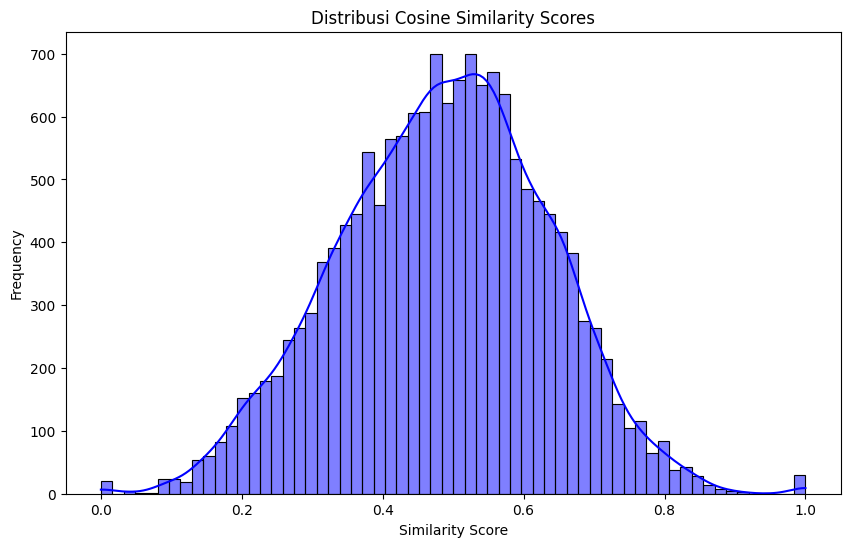

In [8]:
# Membuat DataFrame untuk test set
test_df = pd.DataFrame(X_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
test_df['Title'] = df.iloc[y_test.index]['Title'].reset_index(drop=True)  # Menambahkan 'Title' dari df asli
test_df['Category'] = y_test.reset_index(drop=True)  # Menambahkan 'Category' untuk label target

# Evaluasi model dengan cosine similarity
def evaluate_model(test_df):
    similarities = []  # List untuk menyimpan nilai similarity
    for query in test_df['Title']:
        recommended = recommend_recipe(query)
        for recipe in recommended:
            # Ambil similarity score dari output rekomendasi
            score = float(recipe.split('Similarity Score: ')[1].split()[0])
            similarities.append(score)
    average_similarity = np.mean(similarities)
    return average_similarity, similarities  # Kembalikan rata-rata dan list similarity

# Evaluasi model
print("Evaluasi model berdasarkan cosine similarity...")
average_similarity, similarities = evaluate_model(test_df)  # Mendapatkan similarities
print(f"Average Cosine Similarity for Test Set: {average_similarity:.4f}")

# Visualisasi distribusi similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(similarities, kde=True, color='blue')  # Menggunakan similarities untuk grafik
plt.title("Distribusi Cosine Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# Menambahkan Input Interaktif untuk Pengguna

Pada bagian ini, kita menambahkan fitur input interaktif di Google Colab untuk memungkinkan pengguna mencari resep berdasarkan masukan teks. Dengan menggunakan antarmuka interaktif, pengguna dapat memasukkan nama resep dan mendapatkan rekomendasi resep yang paling relevan.

### Langkah-langkah:
1. **Fungsi `interactive_recommendation`**:
   - Fungsi ini menerima parameter `query`, yang merupakan input dari pengguna (misalnya, nama resep yang ingin dicari).
   - Fungsi ini kemudian memanggil **`recommend_recipe`**, yang akan memberikan 5 resep teratas yang paling relevan berdasarkan **Cosine Similarity**.
   - Setiap resep yang direkomendasikan akan ditampilkan dengan informasi lengkap seperti nama resep, bahan-bahan, langkah-langkah pembuatan, dan skor **Cosine Similarity**.

2. **Menampilkan Widget Input**:
   - **`ipywidgets.interact`** digunakan untuk menampilkan widget input interaktif yang memungkinkan pengguna untuk memasukkan nama resep.
   - Pengguna dapat mengetikkan nama resep (misalnya, "Ayam Goreng") dan sistem akan memberikan rekomendasi resep yang paling relevan.

In [9]:
# Menambahkan input interaktif untuk pengguna
def interactive_recommendation(query):
    recommended_recipes = recommend_recipe(query)
    print("Rekomendasi resep:")
    for recipe in recommended_recipes:
        print(recipe)

# Menampilkan widget input
interact(interactive_recommendation, query="Ayam Goreng")

interactive(children=(Text(value='Ayam Goreng', description='query'), Output()), _dom_classes=('widget-interac…

<function __main__.interactive_recommendation(query)>

# Menyimpan Model dan Dataframe ke File

Pada bagian ini, kita menyimpan beberapa objek yang telah diproses dan dilatih dalam proyek ini ke dalam file agar dapat digunakan kembali di masa depan tanpa perlu melakukan pelatihan ulang. Objek yang disimpan meliputi **TF-IDF Vectorizer**, **SVM Model**, **Random Forest Model**, dan **DataFrame** yang telah diproses.

### Langkah-langkah Menyimpan Model dan Dataframe:
1. **Menyimpan Model TF-IDF**:
   - **TF-IDF Vectorizer** yang telah digunakan untuk mengonversi teks menjadi representasi numerik disimpan menggunakan **pickle**. Ini memungkinkan kita untuk menggunakan kembali model ini tanpa perlu mengulang proses pembuatan TF-IDF dari awal.
   - File disimpan dengan nama **`tfidf_vectorizer.pkl`**.

2. **Menyimpan Model SVM**:
   - Model **SVM (Support Vector Machine)** yang telah dilatih disimpan dalam file **`svm_model.pkl`** menggunakan **pickle**.
   - Ini memungkinkan kita untuk memuat model ini di kemudian hari untuk melakukan prediksi tanpa perlu melatih ulang model.

3. **Menyimpan Model Random Forest**:
   - Model **Random Forest** yang telah dilatih disimpan dalam file **`rf_model.pkl`**. Sama seperti model SVM, ini memungkinkan kita untuk menggunakan model tersebut tanpa perlu melatihnya kembali.

4. **Menyimpan DataFrame yang Sudah Diproses**:
   - **DataFrame** yang berisi semua data resep yang telah diproses disimpan dalam format **CSV** menggunakan **pandas**. File ini disimpan dengan nama **`resep_masakan_indonesia.csv`**. Data ini dapat digunakan untuk analisis atau pemodelan di masa depan.

In [10]:
# Menyimpan model TF-IDF ke file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Menyimpan model SVM dan Random Forest
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Menyimpan dataframe yang sudah diproses
df.to_csv('resep_masakan_indonesia.csv', index=False)